In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv("data/song_data.csv")

In [5]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [6]:
kmeans = KMeans(n_clusters=300)

In [7]:
kmeans.fit(data.drop('song_name',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=300, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
kmeans.cluster_centers_

array([[4.90232558e+01, 1.27012395e+05, 3.81487293e-01, ...,
        1.12107000e+02, 3.93023256e+00, 5.07969767e-01],
       [5.43333333e+01, 2.32135830e+05, 2.52946351e-01, ...,
        1.21226637e+02, 3.96296296e+00, 5.02347407e-01],
       [4.87368421e+01, 3.52095526e+05, 3.44458895e-01, ...,
        1.20511632e+02, 3.89473684e+00, 6.18263158e-01],
       ...,
       [5.22962963e+01, 1.35787926e+05, 5.09145185e-01, ...,
        1.32084815e+02, 4.07407407e+00, 5.77414815e-01],
       [4.90357143e+01, 1.23036214e+05, 4.78487750e-01, ...,
        1.10433929e+02, 3.89285714e+00, 4.39510714e-01],
       [5.41807229e+01, 2.60204241e+05, 2.43038764e-01, ...,
        1.24611145e+02, 4.07228916e+00, 5.02292771e-01]])

In [9]:
info = pd.read_csv("data/song_info.csv")

In [10]:
info.groupby("playlist").nunique()

,song_name,artist_name,album_names,playlist
playlist,,,,
00s Rock Anthems,60,52,57,1
100% LatinX,59,57,59,1
2000s Smash Hits,80,41,66,1
50 Latin Classics,50,49,49,1
60s Rock Anthems,100,62,92,1
...,...,...,...,...
Workout Twerkout,49,38,47,1
You & Me,100,79,86,1
Young & Free,100,91,100,1


In [11]:
df = data.to_numpy()

In [12]:
df[:,1]

array([73, 66, 76, ..., 23, 55, 60], dtype=object)

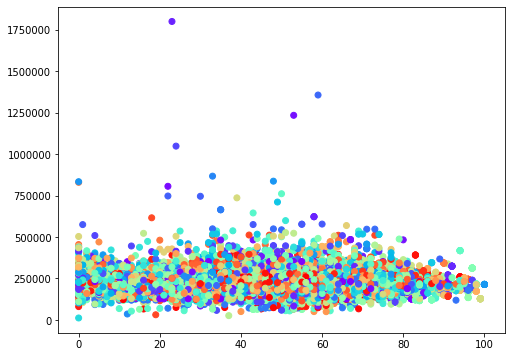

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(df[:,1], df[:,2], c=kmeans.labels_, cmap='rainbow')

In [14]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = kmeans.labels_

In [15]:
combined_data = data.join(info.drop("song_name",axis=1)).join(cluster_map.drop("data_index",axis=1)).drop_duplicates(subset=['song_name',"artist_name","song_duration_ms"],keep="last")

In [16]:
combined_data[combined_data.cluster == 287].describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,cluster
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.0
mean,43.000000,365624.571429,0.267896,0.512714,0.634286,0.041561,5.571429,0.203714,-8.129286,0.857143,0.100814,133.961000,4.0,0.485714,287.0
std,25.205819,433.802512,0.231400,0.196132,0.123943,0.082692,4.117327,0.194791,1.429304,0.377964,0.146677,36.832653,0.0,0.293230,0.0
min,4.000000,365000.000000,0.003270,0.287000,0.514000,0.000000,0.000000,0.079300,-9.875000,0.000000,0.030400,84.747000,4.0,0.126000,287.0
25%,27.500000,365399.500000,0.143000,0.395000,0.540500,0.000003,2.500000,0.091850,-9.262500,1.000000,0.031800,112.690000,4.0,0.300500,287.0
50%,50.000000,365480.000000,0.234000,0.485000,0.562000,0.000624,6.000000,0.160000,-7.934000,1.000000,0.037300,118.881000,4.0,0.498000,287.0
75%,57.500000,365946.500000,0.312000,0.574500,0.731000,0.032650,8.500000,0.185000,-7.338000,1.000000,0.072200,163.141000,4.0,0.614000,287.0
max,77.000000,366200.000000,0.728000,0.878000,0.821000,0.225000,11.000000,0.633000,-5.895000,1.000000,0.430000,182.437000,4.0,0.947000,287.0


In [17]:
combined_data[combined_data.cluster == 287].sort_values(by=["song_popularity"],ascending=False).head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist,cluster
15956,Don't Stop 'Til You Get Enough - Single Version,77,365466,0.12600,0.878,0.821,0.046100,11,0.1830,-9.875,1,0.0890,118.881,4,0.947,Michael Jackson,Off the Wall,Songs to Sing in the Shower,287
497,Come Sail Away,59,365000,0.16000,0.287,0.562,0.000000,0,0.1030,-7.549,1,0.0304,147.622,4,0.126,Styx,Gold,70s Rock Anthems,287
7728,Respiration,56,365333,0.23400,0.505,0.745,0.000000,6,0.1870,-5.895,0,0.4300,178.660,4,0.501,Black Star,Mos Def & Talib Kweli Are Black Star,Gold School,287
10222,Sofrito,50,366200,0.27500,0.644,0.519,0.019200,10,0.0793,-8.895,1,0.0373,117.739,4,0.453,Mongo Santamaria,Sofrito,Latin Jazz,287
16715,"Rise - 12"" Version",37,365480,0.00327,0.485,0.717,0.000006,7,0.6330,-9.630,1,0.0309,84.747,4,0.727,Public Image Ltd.,Rise: The Collection,The '80s All Lined Up,287
10674,The Blackest Day,18,365760,0.34900,0.413,0.514,0.000624,2,0.0807,-7.934,1,0.0327,107.641,4,0.148,Lana Del Rey,Honeymoon,Life Sucks,287
10239,Besame Mucho,4,366133,0.72800,0.377,0.562,0.225000,3,0.1600,-7.127,1,0.0554,182.437,4,0.498,Bobby Sanabria,Big Band Urban Folktales,Latin Jazz,287
